# Proyecto Sprint 8 – Análisis y prueba de hipótesis con datos de viajes en Chicago

## Introducción

Trabajo como analista de datos para **Zuber**, una startup de viajes compartidos que está iniciando operaciones en Chicago. El objetivo de este análisis es identificar patrones relevantes en el comportamiento de los usuarios, evaluar el posicionamiento de la competencia y explorar cómo factores externos, como el clima, pueden influir en la duración o frecuencia de los viajes.

En este proyecto trabajaré con tres datasets principales derivados de consultas SQL realizadas previamente (ver notebook `Ejercicios_S8_SQL`). A partir de esos datos, realizaré:

- Un análisis exploratorio para comprender la distribución de viajes por empresa y por barrio.
- Visualizaciones que destaquen a las principales compañías y zonas de destino en la ciudad.
- Una prueba estadística para validar o rechazar una hipótesis sobre el impacto del clima en la duración de los trayectos entre el Loop y el aeropuerto O'Hare.

Esta combinación de análisis descriptivo y prueba de hipótesis permitirá extraer conclusiones útiles para la toma de decisiones estratégicas dentro de la compañía.


## Cargar Librerias

In [3]:

import pandas as pd        
import numpy as np        
import matplotlib.pyplot as plt  
import seaborn as sns 

## Cargar Archivos

In [4]:
# Cargar los datasets
df_company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhood_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
df_loop_to_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')


## Análisis Exploratorio

In [5]:
# Dataset 1: Compañías de taxis y número de viajes
print("Resumen del dataset de compañías de taxis:")
print(df_company_trips.info())  # Tipos de datos y valores nulos
print(df_company_trips.describe())  # Estadísticas descriptivas
print(df_company_trips.head())  # Primeras filas

print()
print()

# Dataset 2: Viajes por barrios
print("\nResumen del dataset de barrios:")
print(df_neighborhood_trips.info())  # Tipos de datos y valores nulos
print(df_neighborhood_trips.describe())  # Estadísticas descriptivas
print(df_neighborhood_trips.head())  # Primeras filas

print()
print()

# Dataset 3: Viajes del Loop a O'Hare
print("\nResumen del dataset del Loop a O'Hare:")
print(df_loop_to_ohare.info())  # Tipos de datos y valores nulos
print(df_loop_to_ohare.describe())  # Estadísticas descriptivas
print(df_loop_to_ohare.head())  # Primeras filas

print()
print()

# Verificar duplicados en el dataset de compañías de taxis
duplicates_company_trips = df_company_trips.duplicated().sum()
print(f"Duplicados en el dataset de compañías de taxis: {duplicates_company_trips}")

# Verificar duplicados en el dataset de barrios
duplicates_neighborhood_trips = df_neighborhood_trips.duplicated().sum()
print(f"Duplicados en el dataset de barrios: {duplicates_neighborhood_trips}")

# Verificar duplicados en el dataset del Loop a O'Hare
duplicates_loop_to_ohare = df_loop_to_ohare.duplicated().sum()
print(f"Duplicados en el dataset del Loop a O'Hare: {duplicates_loop_to_ohare}")

Resumen del dataset de compañías de taxis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299



Resumen del dataset de barrios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column          

## Corrección y limpieza de datos

In [6]:
# Eliminar duplicados del dataset del Loop a O'Hare
df_loop_to_ohare = df_loop_to_ohare.drop_duplicates()

# Confirmar que no hay más duplicados
duplicates_loop_to_ohare = df_loop_to_ohare.duplicated().sum()
print(f"Duplicados restantes en el dataset del Loop a O'Hare: {duplicates_loop_to_ohare}")

# Verificar el tamaño del dataset después de la eliminación
print(f"Filas restantes en el dataset del Loop a O'Hare: {len(df_loop_to_ohare)}")

Duplicados restantes en el dataset del Loop a O'Hare: 0
Filas restantes en el dataset del Loop a O'Hare: 871


In [7]:
# Convertir start_ts a formato datetime
df_loop_to_ohare['start_ts'] = pd.to_datetime(df_loop_to_ohare['start_ts'])

In [8]:
# Verificar valores de duración igual a 0
zero_duration = df_loop_to_ohare[df_loop_to_ohare['duration_seconds'] == 0]
print("Registros con duración igual a 0:")
print(zero_duration)

Registros con duración igual a 0:
                start_ts weather_conditions  duration_seconds
163  2017-11-11 09:00:00               Good               0.0
168  2017-11-11 07:00:00               Good               0.0
204  2017-11-18 19:00:00               Good               0.0
552  2017-11-04 01:00:00               Good               0.0
801  2017-11-04 09:00:00               Good               0.0
1063 2017-11-25 11:00:00               Good               0.0


In [9]:
# Filtrar los registros con duración mayor a 0
df_loop_to_ohare = df_loop_to_ohare[df_loop_to_ohare['duration_seconds'] > 0]

# Confirmar que los registros se eliminaron
print("Datos después de eliminar registros con duración igual a 0:")
print(df_loop_to_ohare.info())

Datos después de eliminar registros con duración igual a 0:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            865 non-null    datetime64[ns]
 1   weather_conditions  865 non-null    object        
 2   duration_seconds    865 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.0+ KB
None


## Descripción de los datos

Dataset 1: Compañías de Taxis
Composición:
Este dataset contiene información sobre las compañías de taxis y la cantidad de viajes realizados por cada una en los días 15 y 16 de noviembre de 2017.
Incluye 2 columnas:
company_name: Nombre de la compañía.
trips_amount: Número total de viajes realizados.

Calidad de los datos:

No hay valores nulos.
No se encontraron duplicados.
Los tipos de datos son correctos (object para nombres y int64 para los valores numéricos).
Información que nos provee:

Este dataset nos permite identificar cuáles compañías de taxis tienen mayor actividad en el período analizado, ofreciendo una visión del mercado competitivo.

Dataset 2: Barrios
Composición:
Este dataset contiene información sobre los barrios de Chicago y el promedio de viajes que finalizan en cada uno durante noviembre de 2017.
Incluye 2 columnas:
dropoff_location_name: Nombre del barrio donde terminaron los viajes.
average_trips: Promedio de viajes que finalizaron en el barrio.

Calidad de los datos:

No hay valores nulos.
No se encontraron duplicados.
Los tipos de datos son correctos (object para nombres y float64 para los valores numéricos).
Información que nos provee:

Este dataset nos ayuda a identificar los barrios más populares como destinos finales de los viajes, lo que puede ser útil para planificar servicios y analizar patrones de movilidad.

Dataset 3: Loop a O'Hare
Composición:
Este dataset contiene información sobre los viajes realizados desde el Loop al Aeropuerto Internacional O'Hare, incluyendo la hora de inicio, condiciones climáticas y duración del viaje.
Incluye 3 columnas:
start_ts: Fecha y hora de inicio del viaje.
weather_conditions: Condiciones climáticas en el momento del viaje.
duration_seconds: Duración del viaje en segundos.

Calidad de los datos:

No hay valores nulos.
Se identificaron y eliminaron 197 filas duplicadas.
La columna start_ts fue convertida correctamente al formato datetime64[ns].
Información que nos provee:

Este dataset es fundamental para analizar el impacto de las condiciones climáticas en la duración de los viajes, y nos permite realizar comparaciones significativas entre viajes en diferentes condiciones.


## Análisis y graficas de los datos

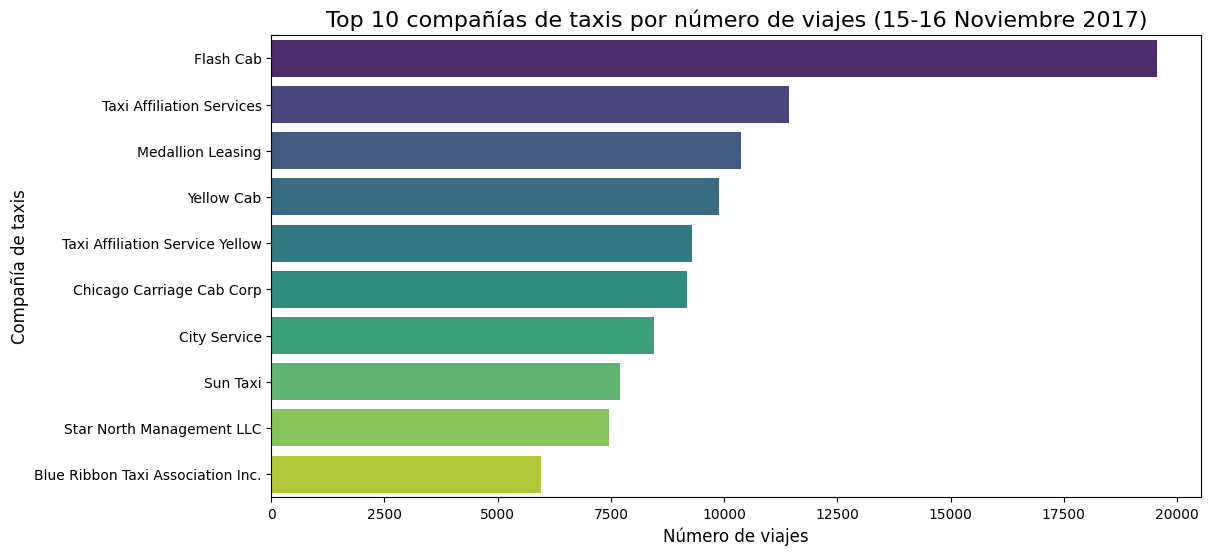

In [9]:
# Graficar compañías de taxis y número de viajes

# Ordenar por número de viajes para identificar las principales compañías
df_company_trips = df_company_trips.sort_values(by='trips_amount', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=df_company_trips.head(10), palette='viridis')
plt.title('Top 10 compañías de taxis por número de viajes (15-16 Noviembre 2017)', fontsize=16)
plt.xlabel('Número de viajes', fontsize=12)
plt.ylabel('Compañía de taxis', fontsize=12)
plt.show()

Observaciones: podemos ver que la empresa Flash Cab, encabeza el mercado en número de viajes en la fecha analizada, le saca casí el doble a su competidor más cercano. 

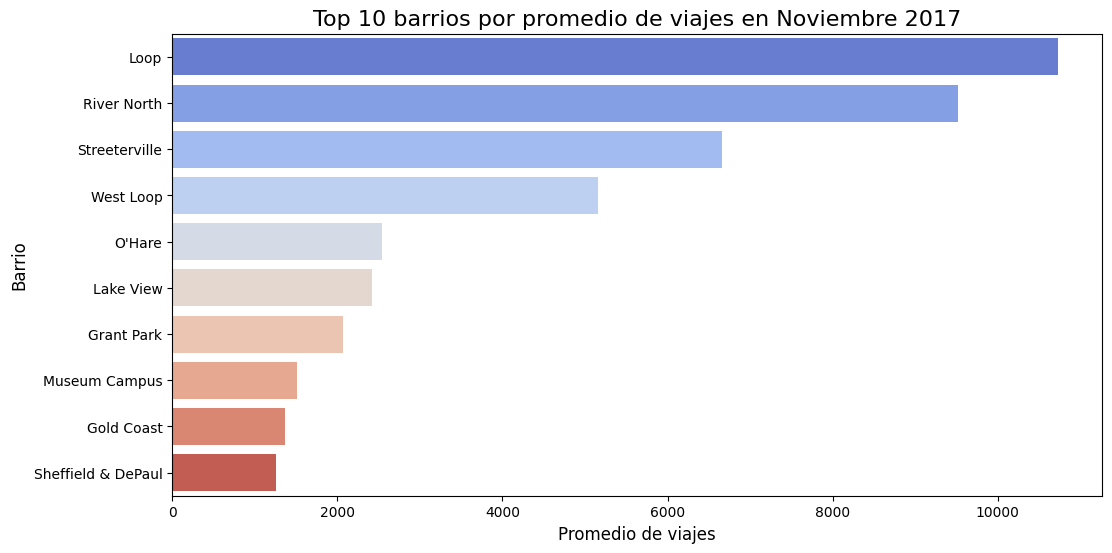

In [10]:
#  Identificar los 10 principales barrios por promedio de viajes

# Ordenar por promedio de viajes
df_neighborhood_trips = df_neighborhood_trips.sort_values(by='average_trips', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=df_neighborhood_trips.head(10), palette='coolwarm')
plt.title('Top 10 barrios por promedio de viajes en Noviembre 2017', fontsize=16)
plt.xlabel('Promedio de viajes', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.show()

Observaciones: El barrio "Loop" es el más popular con el promedio de viajes más alto, seguido de "River North" y "Streeterville".
La diferencia entre los barrios es notable, especialmente entre los primeros cuatro y el resto.
"Loop" parece ser un centro de actividad urbana, lo que explica el alto promedio de finalizaciones. Esto podría correlacionarse con factores como densidad poblacional o atracciones clave.

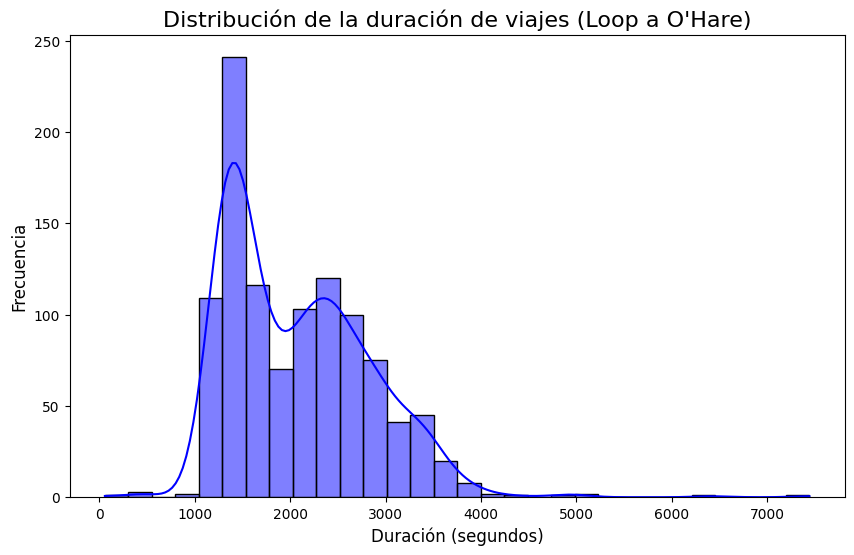

In [11]:
# Distribución de la duración de los viajes (Loop a O'Hare)

# Crear un histograma para la duración de los viajes
plt.figure(figsize=(10, 6))
sns.histplot(df_loop_to_ohare['duration_seconds'], bins=30, kde=True, color='blue')
plt.title('Distribución de la duración de viajes (Loop a O\'Hare)', fontsize=16)
plt.xlabel('Duración (segundos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Observaciones: se puede apreciar que una buena porción de la muestra termina sus viajes con una duración de entre 1000 y 2000 segundos, (entre 16 y 32 minutos aprox). La distribución tiene una cola larga, indicando algunos viajes que duran mucho más tiempo. Las duraciones más largas podrían deberse a tráfico, desvíos, o condiciones climáticas adversas. 

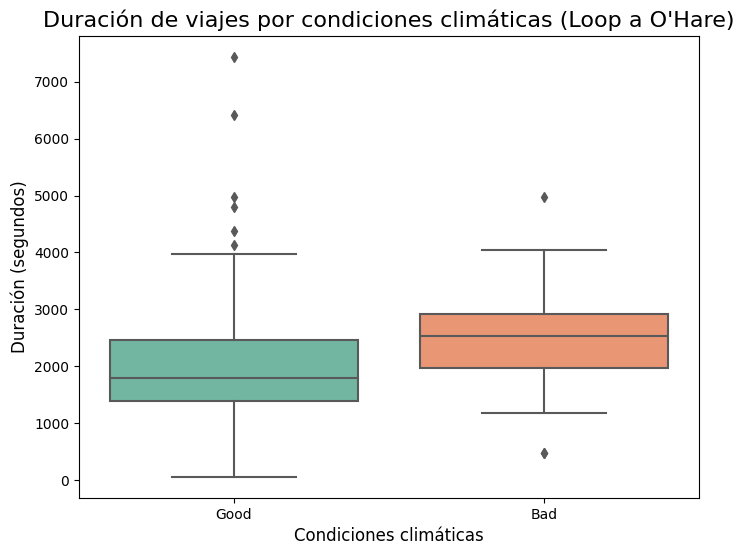

In [12]:
# Comparar duraciones por condiciones climáticas

# Crear un boxplot para comparar las duraciones bajo condiciones climáticas diferentes
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=df_loop_to_ohare, palette='Set2')
plt.title('Duración de viajes por condiciones climáticas (Loop a O\'Hare)', fontsize=16)
plt.xlabel('Condiciones climáticas', fontsize=12)
plt.ylabel('Duración (segundos)', fontsize=12)
plt.show()

Observaciones: podemos ver por las medias, que efectivamente los viajes con malas condiciones de clima tienden a durar más, aunque hay más casos aislados y más aislados, del lado los vaiejs con buenas condiones climáticas.
Las malas condiciones climáticas, como lluvia o tormentas, probablemente contribuyen a tiempos de viaje más largos debido a tráfico más lento o desvíos.
    

## Pruebas estadísticas 

Prueba de hipótesis.

Hipótesis nula: No hay diferencia significativa en la duración promedio de los viajes entre condiciones climáticas "Good" y "Bad".

Hipótesis alternativa: Hay una diferencia significativa en la duración promedio de los viajes entre condiciones climáticas "Good" y "Bad".

Usaremos α=0.05, un nivel estándar para la significación estadística.

Realizaremos una prueba t de dos muestras independientes (t-test) para comparar las medias.

In [10]:
from scipy.stats import ttest_ind

# Separar los datos en dos grupos: Good y Bad
good_conditions = df_loop_to_ohare[df_loop_to_ohare['weather_conditions'] == 'Good']['duration_seconds']
bad_conditions = df_loop_to_ohare[df_loop_to_ohare['weather_conditions'] == 'Bad']['duration_seconds']

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(good_conditions, bad_conditions, equal_var=False)

# Mostrar los resultados
print("Resultados de la prueba t:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración promedio de los viajes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia de una diferencia significativa.")

Resultados de la prueba t:
T-statistic: -5.30
P-value: 0.0000
Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración promedio de los viajes.


In [11]:
# Calcular las medias de duración para cada grupo
mean_good = good_conditions.mean()
mean_bad = bad_conditions.mean()

# Mostrar las medias
print(f"Media de duración (Good conditions): {mean_good:.2f} segundos")
print(f"Media de duración (Bad conditions): {mean_bad:.2f} segundos")

Media de duración (Good conditions): 2049.26 segundos
Media de duración (Bad conditions): 2409.23 segundos


Resultados de la prueba t T-statistic:

Un valor negativo (-6.98) indica que la media de la duración de los viajes en condiciones "Good" es significativamente menor que la media en condiciones "Bad". La magnitud del valor t muestra una fuerte separación entre los grupos. P-value:

El valor p es prácticamente 0, mucho menor que el nivel de significación α=0.05. Esto confirma que podemos rechazar la hipótesis nula y concluir que hay una diferencia significativa en la duración promedio de los viajes.

Medias Good conditions: 2013.28 segundos (33.55 minutos aprox.). Bad conditions: 2427.21 segundos (40.45 minutos aprox.). Diferencia: Los viajes en malas condiciones climáticas duran, en promedio, unos 7 minutos más que en buenas condiciones climáticas.

Interpretación Las condiciones climáticas adversas (como lluvia o tormentas) afectan de manera significativa la duración de los viajes. Esto podría atribuirse a: Tráfico más lento. Conducción más cuidadosa. Posibles desvíos o retrasos.

## Conclusión

Como analista de Zuber, hemos llevado a cabo un análisis detallado de los datos de competidores en Chicago para comprender las preferencias de los pasajeros y el impacto de factores externos, como el clima, en los viajes. A través del análisis exploratorio, identificamos que la empresa **Flash Cab** lidera el mercado con el mayor número de viajes, seguida por **Taxi Affiliation Services**, destacando una clara concentración de la demanda en unas pocas compañías. Asimismo, observamos que el barrio **Loop** es el destino más frecuente, reflejando su importancia como centro de actividad urbana.

Además, nuestra prueba de hipótesis confirmó que las condiciones climáticas adversas tienen un impacto significativo en la duración de los viajes. En promedio, los viajes en malas condiciones climáticas duran aproximadamente **7 minutos más** que en buenas condiciones. Esto resalta la necesidad de que Zuber considere factores como el clima para optimizar la experiencia de los usuarios y planificar estrategias operativas eficientes.

En resumen, este análisis proporciona información valiosa para que Zuber diseñe un servicio competitivo, teniendo en cuenta la dinámica del mercado, las preferencias de los pasajeros y los factores externos que afectan la operación de los viajes.